핸즈온 9장 비지도학습 p.328~347

# 9. 비지도 학습
## 9.2 가우시안 혼합

가우시안 혼합 모델(GMM)

: 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성
- 일반적으로 타원형 클러스터


여러 GMM 변종

(가장 간단한 버전이 GaussianMixture 클래스에 구현되어 있음)

- 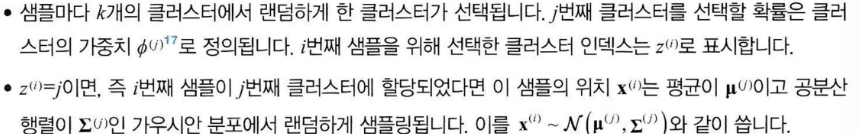

- 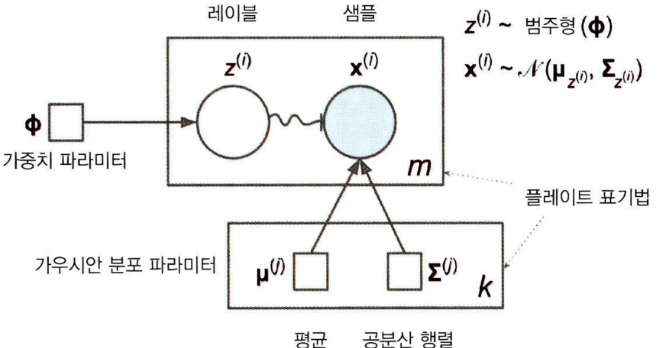

- 원은 확률변수
- 사각형은 고정갑 (모델의 파라미터)
- 플레이트 : 큰 사각형, 이 사각형 안의 내용이 여러 번 반복됨
- 각 플레이트 오른쪽 아래 숫자 : 플레이트 안의 내용이 반복되는 횟수
- 각 변수 z(i)는 가중치를 갖는 범주형 분포에서 샘플링함, 각 변수 x(i)는 해당하는 클러스터 z(i)로 정의된 평균과 공분산 행렬을 사용해 정규분포에서 샘플링함
- 실선 화살표는 조건부 의존성을 표현함
- 스위치 : z(i)에서 x(i)까지 구불구불한 화살표
- 관측 변수 : 색이 채워진 원, 알려진 값, 확률 변수 x(i)만 알고 있는 값
- 잠재 변수 : 알려지지 않은 확률변수 z(i)

In [ ]:
# 반달 모양 데이터셋에서 테스트
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

-> 잘 작동함

기댓값-최적화(EM) 알고리즘을 사용
- 클러스터 파라미터를 랜덤하게 초기화하고 수렴할때까지 두 단계를 반복함
- 기댓값 단계 : 샘플을 클러스터에 할당함
- 최대화 단계 : 클러스터를 업데이트함
- 클러스터의 책임 : 클러스터에 속할 추정 확률, 샘플에 가중치가 적용됨

In [ ]:
gm.converged_ # 알고리즘의 수렴 여부

True

In [ ]:
gm.n_iter_ # 알고리즘의 반복 횟수

18

- 하드 군집 : 새로운 샘플을 가장 비슷한 클러스터에 손쉽게 할당할 수 있음 => predict() 메서드 사용
- 소프트 군집 : 트겅 클러스터에 속할 확률을 예측할 수 있음 => predict_proba() 메서드 사용

In [ ]:
gm.predict(X)

array([1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1,
       1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,

In [ ]:
gm.predict_proba(X)

array([[5.01276923e-270, 9.99650754e-001, 3.49245955e-004],
       [9.86648718e-001, 3.78064321e-196, 1.33512824e-002],
       [3.06003606e-265, 9.98183086e-001, 1.81691370e-003],
       ...,
       [2.46667142e-007, 1.14158003e-133, 9.99999753e-001],
       [2.28924208e-066, 5.25722372e-043, 1.00000000e+000],
       [1.74554287e-115, 6.21037851e-020, 1.00000000e+000]])

생성모델 : 가우시안 혼합 모델
- 새로운 샘플 만들 수 있음 (반환된 샘플은 클러스터 인덱스 순으로 정렬됨)

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.56617758, -0.38363524],
       [ 1.86234711,  0.20172645],
       [-0.44558088,  0.81577639],
       [ 0.07693561,  0.57050083],
       [ 1.17232686, -0.32756023],
       [ 0.91588391,  0.92972906]])

주어진 위치에서 모델의 밀도 추정하기
- score_samples() 메서드 사용 : 그 위치의 확률 밀도 함수의 로그를 예측 -> 점수가 높을수록 밀도가 높음

In [ ]:
gm.score_samples(X)

array([-4.27147473e-01, -3.77590158e-01, -5.62672204e-02, -1.36460872e+00,
       -2.30964781e+00, -1.79701146e+00, -6.19349333e-01, -9.85740193e-01,
       -1.63230928e+00, -2.52294744e-01, -1.99139122e+00, -1.61967333e+00,
       -2.11852231e-01, -1.71020625e+00, -1.66824694e+00, -1.51327666e+00,
       -1.66778545e+00, -8.03169001e-02, -1.75583044e+00, -2.06903927e+00,
       -1.55982985e+00, -1.97118339e+00, -1.53076364e+00, -1.82220620e+00,
       -1.42835013e+00, -1.63524869e+00, -1.76667378e+00, -2.71852551e+00,
       -1.60940518e+00, -1.47998741e+00, -1.40054538e+00, -1.29672464e+00,
       -2.13476680e+00, -1.56815194e+00, -1.53652857e+00, -1.17382932e+00,
       -1.52079161e+00, -1.85487193e+00, -1.66107815e+00, -5.73524908e-01,
       -2.86612435e-01, -1.50029143e+00, -1.66808978e+00, -1.55331761e+00,
       -1.58757764e+00, -1.18963695e+00, -8.27896793e-02, -4.77793093e-01,
       -1.61763447e+00, -7.88828805e-01, -3.86755776e-01, -1.69446551e+00,
       -1.50515156e+00, -

-> 이 점수의 지숫값을 계산하면 샘플의 위치에서 PDR값을 얻을 수 있음
- 확률 밀도
- 어떤 양숫값
- 샘플이 특정 지역 안에 속할 확률을 예측 : 그 지역에 대해 PDF를 적분

알고리즘이 학습할 파라미터 개수를 제한하는 방법
- 클러스터의 모양과 방향의 범위를 제한하기
- 사이킷런의 covariance_type 매개변수에 하나 설정하기 : 기본값은 'full'
- spherical
- diag
- tied

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
이상치 탐지 : 보통과 많이 다른 샘플을 감지하는 작업

가우시안 혼합 모델을 이상치 탐지에 사용하기
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 봄
- -> 사용할 밀도 임곘값을 정함

In [ ]:
 import numpy as np
 densities = gm.score_samples(X)
 density_threshold = np.percentile(densities,4)
 anomalies = X[densities < density_threshold]

=> 특이치 탐지

### 9.2.2 클러스터 개수 선택하기
- k-평균처럼 GaussianMixture 알고리즘은 클러스터의 개수를 지정해야 함

BIC나 AIC와 같이 이론적 정보 기준을 최소화하는 모델을 찾기
- BIC = log(m)p - wlog(L^)
- AIC = 2p - 2log(L^)

- m : 샘플의 개수
- p : 모델이 학습할 파라미터 개수
- L^ : 모델의 가능도 함수의 최댓값

BIC와 AIC의 모델 선택
- 둘 모두 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함
- 종종 동일한 모델을 선택함
- 선택이 다른 경우, BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한(파라미터가 적은)경향이 있음

In [ ]:
gm.bic(X)

np.float64(2739.605813842593)

In [ ]:
gm.aic(X)

np.float64(2656.1739740998964)

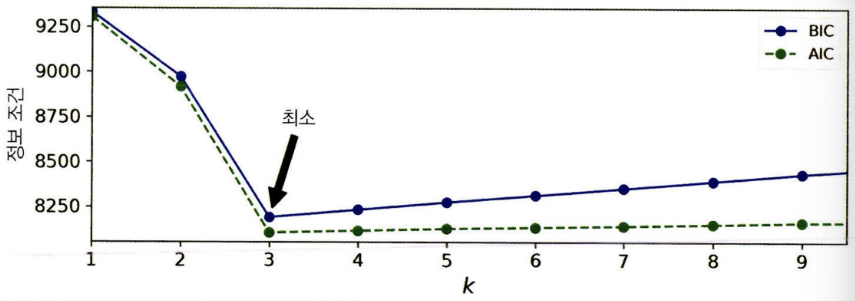

- k=3일때 BIC와 AIC가 모두 가장 작음 => k=3 이 최선의 선택

### 9.2.3 베이즈 가우시안 혼합 모델

BayesianGaussianMixture 클래스 : 불필요한 클러스터의 가중치를 0으로 (0에 가깝게) 만들기
- 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값을 지정

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.17, 0.13, 0.11, 0.13, 0.13, 0.07, 0.08, 0.07, 0.1 , 0.  ])

-> 알고리즘이 자동으로 9개의 클러스터가 필요하다는 것을 감지함

배타 분포
- 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용됨 : 0-1 범위

예시 : SBP(stick-breaking-process)

$\Phi$ = [ 0.3, 0.6, 0.5, ... ]
- 샘플의 30%가 클러스터 0에 할당됨
- 샘플의 60%가 클러스터 1에 할당됨
- 샘플의 50%가 클러스터 2에 할당됨

 - 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델 (사람들이 대도시로 이사갈 가능성이 높음)

 - 농도  $\alpha$ 가 크면 $\Phi$ 값이 0에 가깝게 됨, SBP는 많은 클러스터를 만듦
 - 농도  $\alpha$ 가 낮으면 $\Phi$ 값이 1에 가깝게 됨, SBP는 몇 개의 클러스터만 만듦

- 마지막으로 위샤트 분포를 사용해 공분산 행렬을 샘플링함
 - 파라미터 d와 V가 클러스터 분포 모양을 제어함

 - 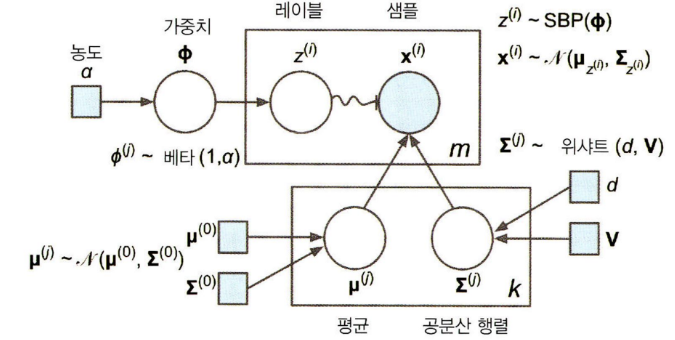



- 잠재 변수 z에 대한 사전 지식이 사전확률(p((z))에 인코딩될 수 있음

예시

- 사전 믿음 : 클러스터가 적을 것이다(낮은 농도), 풍부하다(높은 농도)고 믿을 수 있음
- 클러스터 개수에 대한 사전 믿음은 weight_concentrationi_prior 매개변수 사용해 조정

베이즈 정리 : 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법을 설명함
- X가 주어졌을 때 z의 조건부 확률인 사후 확류 분포 p(z|X)를 계산함
- 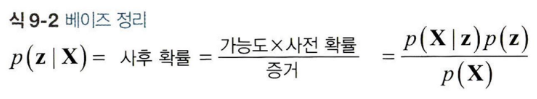

                                                    

- p(x) 는 계산하기 힘듦
- 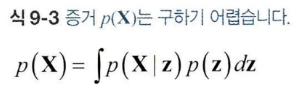

=> 모든 클러스터 파라미터와 클러스터 할당의 조합을 고려해야 함

변분 추론
- 변분 파라미터($\lambda$)를 가진 분포 패밀리 q(z ; $\lambda$) 를 선택함
- q(z) 가 q(z ; $\lambda$)의 좋은 근삿값이 되도록 이 파라미터를 최적화함
- q(z)에서 p(z|X)로의 KL발산($D_{KL}(q \parallel p)$
)을 최소화하는 $\lambda$ 값을 찾아 이를 해결
 - 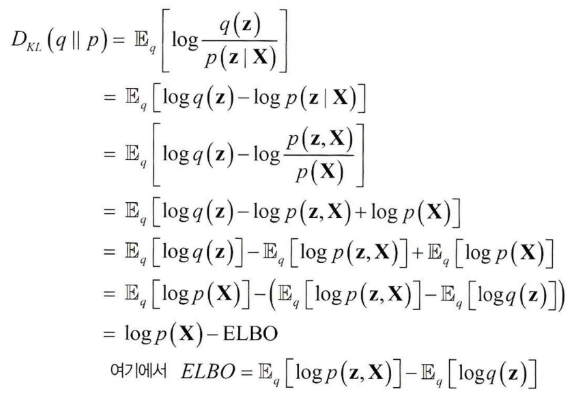

평균장 변분 추론
- ELBO 식을 계싼할 수 있는 형태로 단순화하기 위해 분포 패밀리 q(z ; $\lambda$)와 사전 확률 p(z)를 매우 주의 깊게 선택
- 이를 위한 일반적인 방법이 없음
- 올바른 분포 패밀리 사전 확률을 선택하는 것은 작업에 따라 다르면 수학적 기술이 필요

블랙 박스 확률적 변분 추론(BBSVI)
- ELBO를 최대화하는 간단한 방법
- 각 반복에서 몇 개의 샘플을 q에서 뽑아 변분 파라미터 $\lambda$ 에 대한 ELBO 그레이디언트를 추정하는 데 사용함
- 경사 상승법 스텝에서 사용함

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

1. PCA (그리고 inverse_transform() 메서드를 가진 다른 차원 축소 기법)
- 보통 샘플의 재구성 오차와 이상치의 재구성 오차를 비교하면 일반적으로 후자가 훨씬 큼
- 이는 간단하고 종종 매우 효과적인 이상치 탐지 기법

2. Fast-MCD
- EllipticEnvelope 클래스에서 구현된 이 알고리즘은 이상치 감지에 유용함
- 특히 데이터셋을 정제할 때 사용됨

3. 아이솔레이션 포레스트
- 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘
- 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만듦, 각 노드에서 특성을 랜덤하게 선택한 후 랜덤한 임곗값을 골라 데이터셋을 둘로 나눔
- 데이터셋은 점차 분리되어 모든 샘플이 다른 샘플과 격리될 때까지 진행됨

4. LOF (local outlier factor)
- 이상치 탐지
- 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
- 이상치는 종종 k개의 최근접 이웃보다 더 격리됨

5. one-class SVM
- 특이치 탐지에 적합한 알고리즘
- 일반적인 SVM이 두 개의 클래스를 분리하는 것처럼, one-class SVM은 데이터를 고차원 공간으로 매핑한 후 경계를 설정해 정상 데이터를 둘러쌈
- 새로운 샘플이 이 경계를 벗어나면 이상치로 판단
- 조정할 하이퍼파라미터가 있고, 이상치를 얼마나 민감하게 탐지할 지 결정
- 고차원 데이터셋에서 효과적이지만, 대규모 데이터셋에서는 확장성이 떨어질 수 있음
